<a href="https://colab.research.google.com/github/machiwao/ml-development/blob/main/fccamp_MAGIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#Dataset Reference:
UCI Machine Learning Repository. (n.d.). Archive.ics.uci.edu. https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [4]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [6]:
 # Convert class labels from strings to 0 for 'g' and 1 for 'h'
df["class"] = (df["class"] == "g").astype(int)

In [7]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


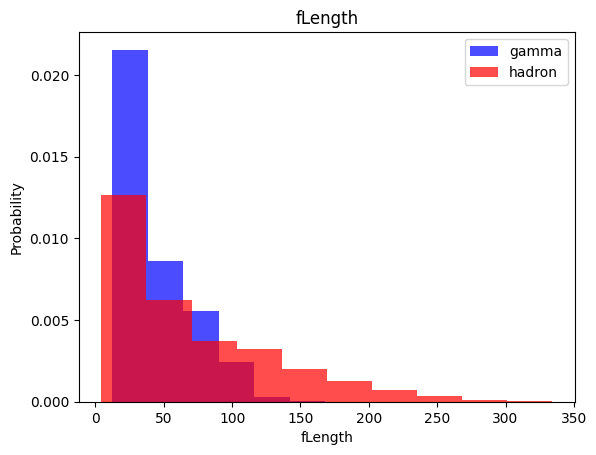

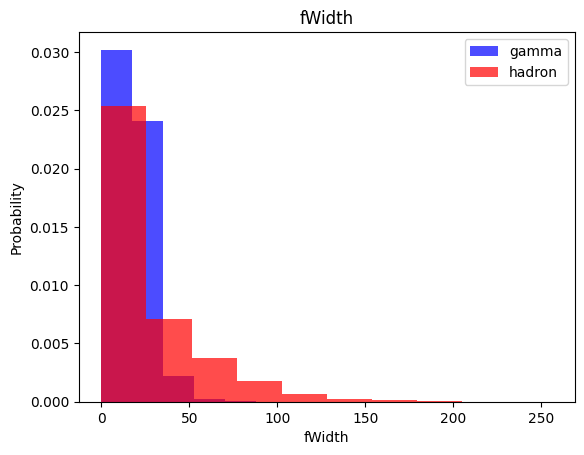

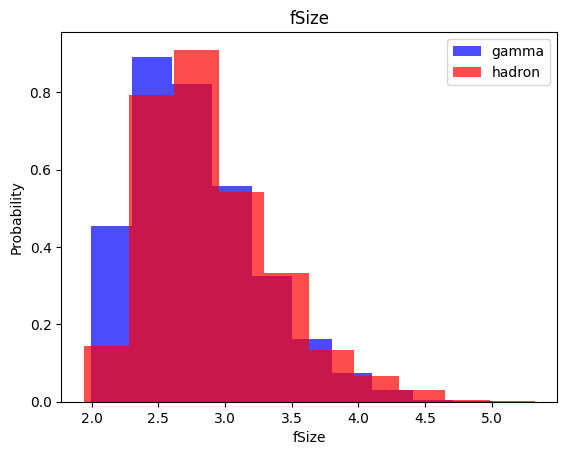

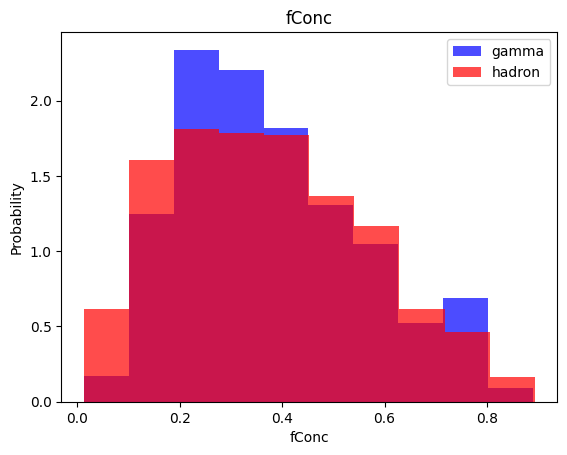

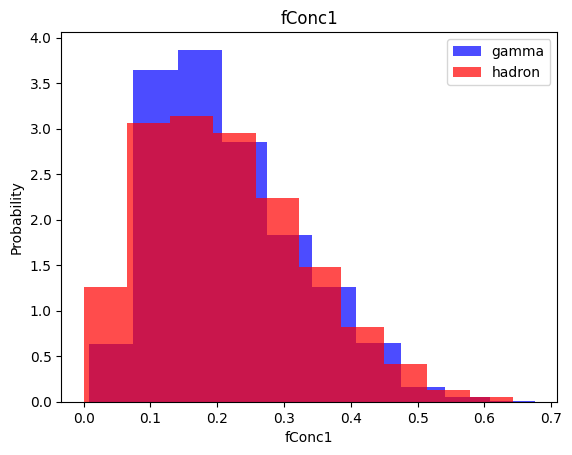

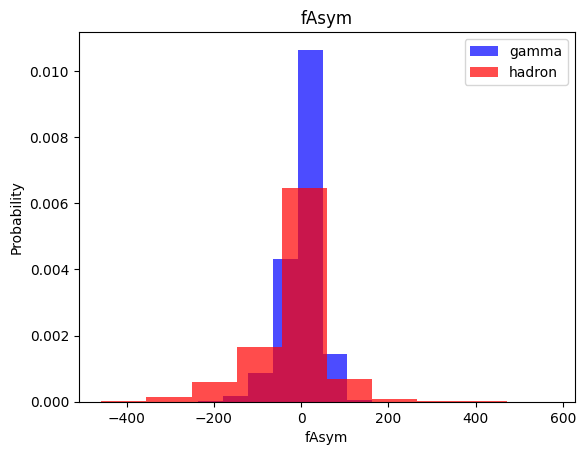

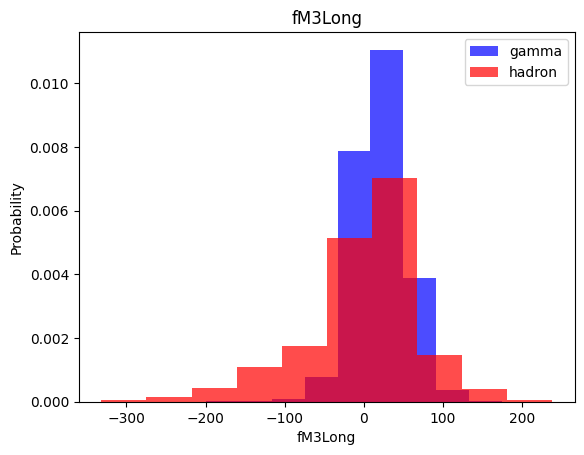

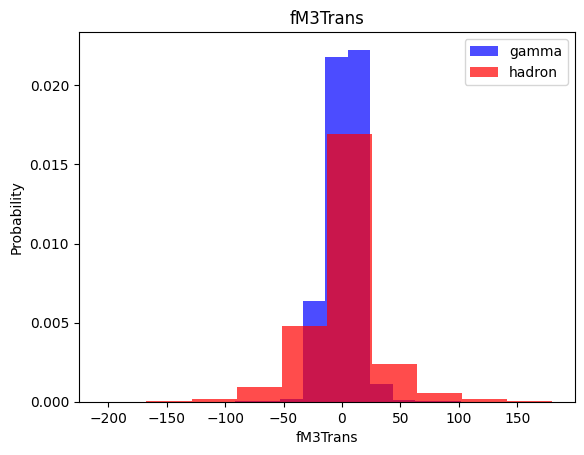

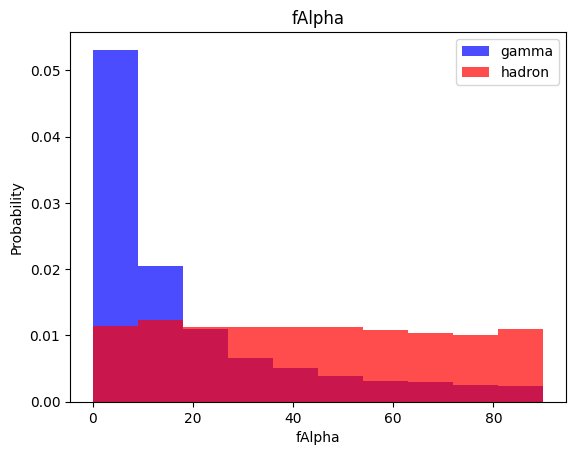

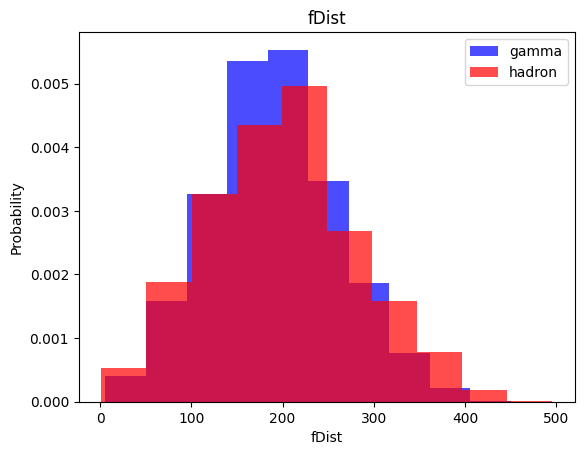

In [8]:
# Plot histograms to check defining features for gamma and hadron
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color = "blue", label = 'gamma', alpha = 0.7, density =True)
  plt.hist(df[df["class"] == 0][label], color = "red", label = 'hadron', alpha = 0.7, density =True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation, test datasets
Preparing data sets

In [11]:
train, valid, test = np.split(df.sample(frac = 1), (int(0.6 * len(df)), int(0.8 * len(df))))

In [9]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  # Scale values
  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  # Oversample to balance out gamma and hadrons
  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  # Create dataframe with scaled values
  data = np.hstack((x, np.reshape(y, (-1, 1))))
  return data, x, y

In [12]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

#k-Nearest Neighbors
Implementation of k-Nearest Neighbors

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn_model.predict(x_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1342
           1       0.85      0.86      0.86      2462

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



- We get an 82% accuracy by checking a point close to the new data
- Precision = how many of the labeled items are truely hadron/gamma
- Recall = how many of the truely hadron/gamma did the model get right

#Naive Bayes

Bayes' Rule : P(A|B) = (P(B|A) . P(A))/P(B)

For Example: <br>
P(false '+') = 0.05
P(false '-') = 0.01
P(disease) = 0.1

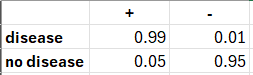

P(disease | + test) = ?
= P('+' | disease) . P(disease) / P(+) <br>
= 0.99 . 0.1 / (0.99 . 0.1) + (0.05 . 0.9)<br>
= 0.099 / (0.099 + 0.045)<br>
= 0.099 / 0.144<br>
= 0.6875 or 68.75%<br>

Naive Bayes' Formula<br>
P(C_k | x) = P(x | C_k) . P(C_k) / P(x)

where: <br>
P(C_k | x) = posterior "how often the class appears given a set of features"

x = feature vector

P(x | C_k) = likelihood "how often the classes are under that category"

P(C_k) = prior "how often the class appears"

P(x) = evidence

Formula is proportional to the following:

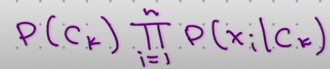


Predicted y:
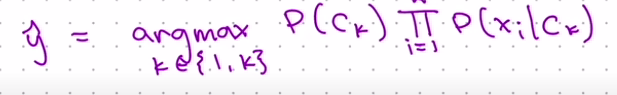


In [17]:
from sklearn.naive_bayes import GaussianNB

In [19]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [21]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.39      0.50      1342
           1       0.73      0.90      0.81      2462

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



- Naive Bayes' Prediction (0.72) is worse than k-Nearest Neighbors (k = 5, 0.81)

#Logistic Regression
How can we model probability?

P = 1/ 1 + e^-(mx + b)

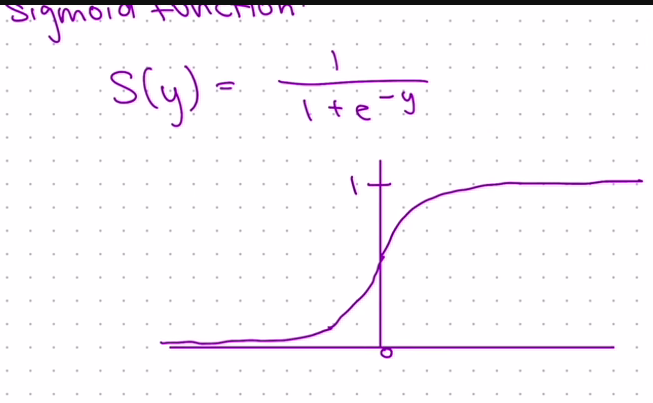

x_0 = simple logistical regression

x_0, x_1, x_2 ... x_n = multiple logistical regression





In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [24]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1342
           1       0.84      0.81      0.83      2462

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



-Multiple Logistical Regression (0.78) is slightly better than Naive Bayes (0.72) but slightly worse than k-Nearest Neighbors (k = 5, 0.81)